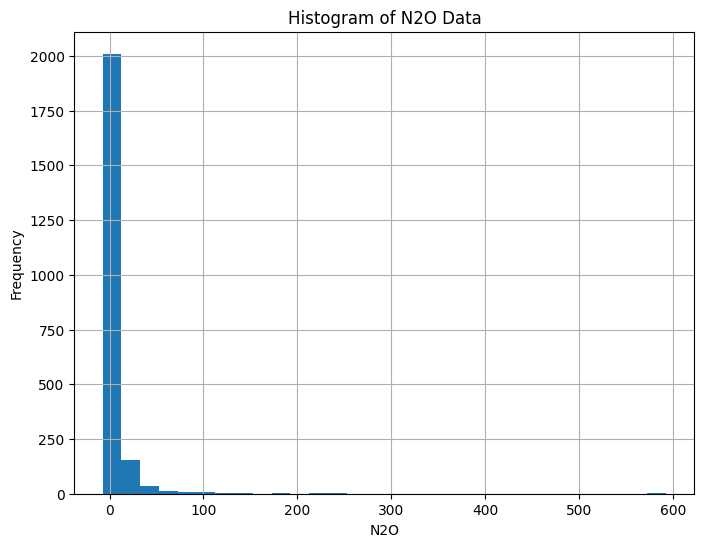

Descriptive Statistics:
Mean: 7.47
Median: 1.97
Mode: 0.00
Standard Deviation: 28.49
Skewness: 11.65
Kurtosis: 185.29

The data is likely not normally distributed.


NameError: name 'stats' is not defined

<Figure size 800x600 with 0 Axes>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Baca data
df = pd.read_csv('dataset/agriculture_dataset.csv')

# Ambil data kolom N2O
n2o_data = df['N2O']

# Visualisasi histogram
plt.figure(figsize=(8, 6))
n2o_data.hist(bins=30)
plt.title('Histogram of N2O Data')
plt.xlabel('N2O')
plt.ylabel('Frequency')
plt.show()

# Hitung statistik deskriptif
mean = n2o_data.mean()
median = n2o_data.median()
mode = n2o_data.mode()[0]
std_dev = n2o_data.std()
skewness = n2o_data.skew()
kurtosis = n2o_data.kurt()

print('Descriptive Statistics:')
print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Mode: {mode:.2f}')
print(f'Standard Deviation: {std_dev:.2f}')
print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')

# Uji normalitas Shapiro-Wilk
_, p_value = shapiro(n2o_data)

if p_value > 0.05:
    print('\nThe data is likely to be normally distributed.')
else:
    print('\nThe data is likely not normally distributed.')

# Visualisasi plot normal Q-Q
plt.figure(figsize=(8, 6))
stats.probplot(n2o_data, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of N2O Data')
plt.show()

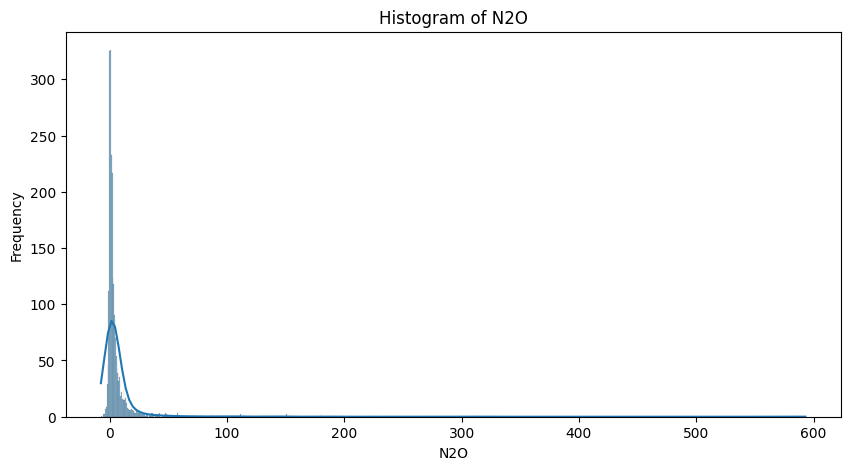

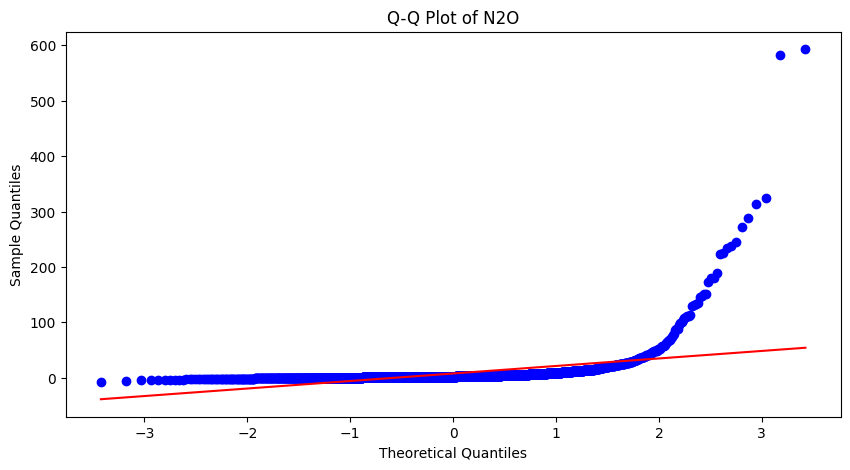

Shapiro-Wilk Test: Statistic=0.228832179099562, p-value=2.636825158955528e-70
Kolmogorov-Smirnov Test: Statistic=0.355207025678939, p-value=4.634035284991335e-254
With StandardScaler - MSE: 511.87874465661326, MAE: 6.697514581628587, R2: 0.46265149934670036
With MinMaxScaler - MSE: 498.8236857550832, MAE: 6.343068552304437, R2: 0.47635614404997606


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder


# Muat dataset
file_path = 'dataset/agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Fokus pada kolom N2O
n2o_data = data['N2O']

# Visualisasi Distribusi dengan Histogram
plt.figure(figsize=(10, 5))
sns.histplot(n2o_data, kde=True)
plt.title('Histogram of N2O')
plt.xlabel('N2O')
plt.ylabel('Frequency')
plt.show()

# Visualisasi Distribusi dengan Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(n2o_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of N2O')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Uji Statistik Shapiro-Wilk
shapiro_test = stats.shapiro(n2o_data)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Uji Statistik Kolmogorov-Smirnov
ks_test = stats.kstest(n2o_data, 'norm', args=(n2o_data.mean(), n2o_data.std()))
print(f'Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}')

# Jika 'N2O' adalah target variable
X = data.drop(columns=['N2O'])
y = data['N2O']

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifikasi kolom numerik dan kategoris
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Define model
xgb_model = XGBRegressor(random_state=42)

# Define two pipelines: one with StandardScaler and one with MinMaxScaler

# Pipeline with StandardScaler
standard_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])),
    ('regressor', xgb_model)
])

# Pipeline with MinMaxScaler
minmax_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])),
    ('regressor', xgb_model)
])

# Fit and evaluate the pipeline with StandardScaler
standard_pipeline.fit(X_train, y_train)
y_pred_standard = standard_pipeline.predict(X_test)

mse_standard = mean_squared_error(y_test, y_pred_standard)
mae_standard = mean_absolute_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

print(f'With StandardScaler - MSE: {mse_standard}, MAE: {mae_standard}, R2: {r2_standard}')

# Fit and evaluate the pipeline with MinMaxScaler
minmax_pipeline.fit(X_train, y_train)
y_pred_minmax = minmax_pipeline.predict(X_test)

mse_minmax = mean_squared_error(y_test, y_pred_minmax)
mae_minmax = mean_absolute_error(y_test, y_pred_minmax)
r2_minmax = r2_score(y_test, y_pred_minmax)

print(f'With MinMaxScaler - MSE: {mse_minmax}, MAE: {mae_minmax}, R2: {r2_minmax}')
